## Build a regression model.

#### Import libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sqlite3
import seaborn as sns

#### Connect to SQLite Database

In [7]:
# Connects to a SQLite database, select specific columns from a table, and store the results in a pandas dataframe.
conn = sqlite3.connect('/Users/brittanyharding/LHL-Projects/Statistical-Modelling-with-Python/data/CityBikes Database.db')
query = 'SELECT name, location, categories, rating, Type, latitude, longitude, free_bikes, price_num FROM clean_yelp_citybikes'
yelp_citybikes_df = pd.read_sql(query, conn)


#### Further clean Database

In [8]:
# Replace any null or empty values with 0 - these were for the cost of the parks which were by in large free
yelp_citybikes_df.fillna(value=0, inplace=True)

In [12]:
# # Convert 'price' column to numeric type, replacing non-numeric values with NaN
yelp_citybikes_df['price_num'] = pd.to_numeric(yelp_citybikes_df['price_num'], errors='coerce')

# # Fill any NaN or null values with a default value
yelp_citybikes_df.fillna(value=0, inplace=True)


#### Set Independent and Dependent Variables

In [13]:
# Dependent variable is 'free_bikes'
y = yelp_citybikes_df['free_bikes']

# Independent variables are 'rating', and 'price'
X = yelp_citybikes_df[['rating', 'price_num']]

#### Run and Print OLS Regression Analysis

In [29]:
# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the model using OLS
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             free_bikes   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.568
Date:                Mon, 24 Apr 2023   Prob (F-statistic):             0.0768
Time:                        11:31:03   Log-Likelihood:                -13118.
No. Observations:                3572   AIC:                         2.624e+04
Df Residuals:                    3569   BIC:                         2.626e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.8140      0.649     21.297      0.0

#### Create Scatterplots with Regression Lines for Better Visualisation

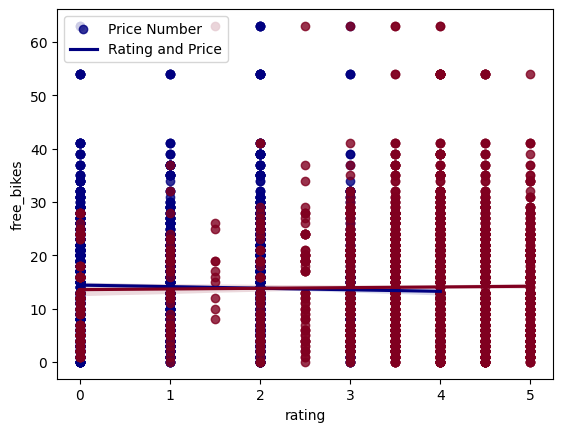

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x='price_num', y='free_bikes', data=yelp_citybikes_df, color='navy')
sns.regplot(x='rating', y='free_bikes', data=yelp_citybikes_df, color='#800020')

plt.legend(labels=['Price Number', 'Rating and Price'])

# Save the figure as PNG
plt.savefig('Regression POI price and rating near CB location', dpi=300, bbox_inches='tight')


#Display the Figure
plt.show()

##### Further look at plotting regression line for rating vs free bikes

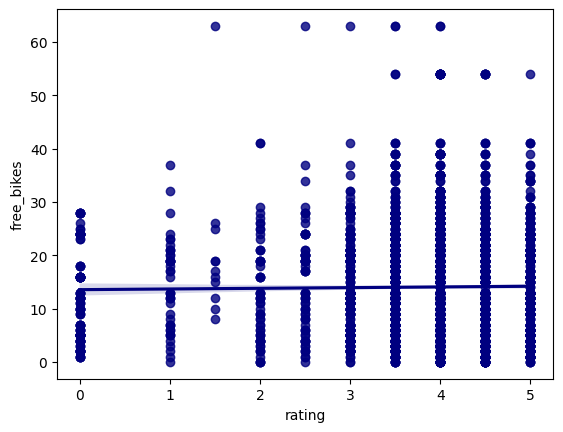

In [26]:
# Plot the regression line
sns.regplot(x='rating', y='free_bikes', data= yelp_citybikes_df, color='navy')


# Save the figure as PNG
plt.savefig('Regression rating near CB location', dpi=300, bbox_inches='tight')

#Display the Figure
plt.show()

##### Further look at plotting regression line for price vs free bikes

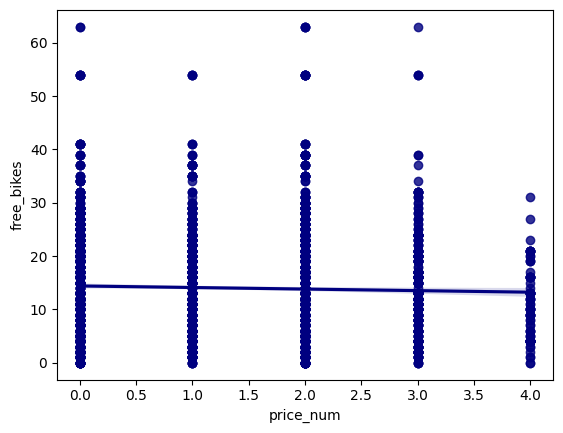

In [27]:
# Plot the regression line
sns.regplot(x='price_num', y='free_bikes', data= yelp_citybikes_df, color='navy')


# Save the figure as PNG
plt.savefig('Regression POI prices near CB location', dpi=300, bbox_inches='tight')

#Display the Figure
plt.show()

# Stretch